<a href="https://colab.research.google.com/github/cecilylynn/data-science-projects/blob/main/Data_Exploration_and_Visualization_of_Baseline_Follower_Counts_THTHS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Exploration & Visualiaztion: "Too Hot To Handle" Season 5 Contestant Baseline Follower Counts
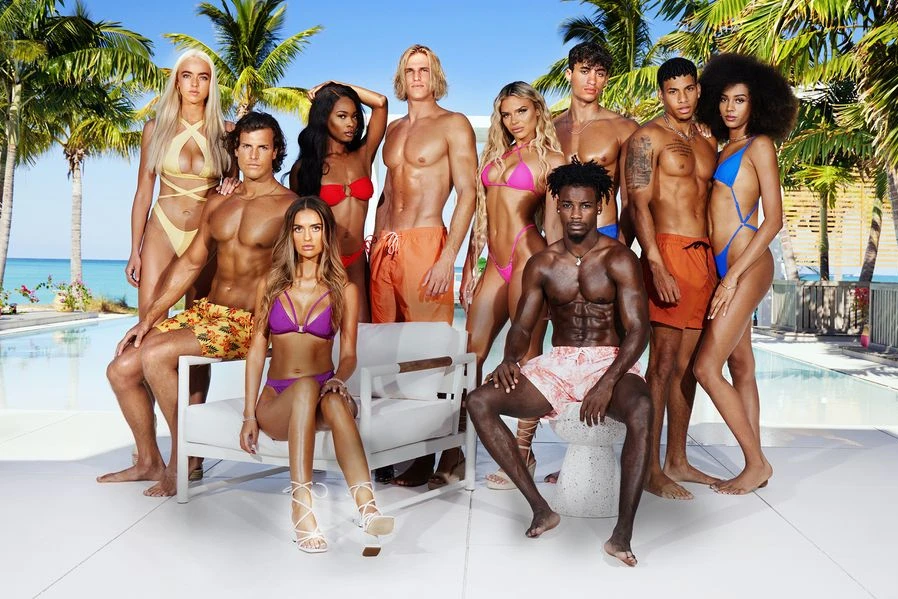

"Too Hot To Handle" (THTH) is a Netflix reality dating show in which hot singles are living together but are not allowed to have any sexual contact. The Season 5 release date and time is July 17, 2023 at 3:01 am EDT. At that time, the first four episodes were be released, with four more on July 21 and the last four on July 28.

The aim of this project is to perform time series analysis on the contestants follower counts to see how episode releases affect the metric. Side goals include comparing data between contestants and looking for correlations between factors relating to contestants' behavior on screen and their follower counts. A stretch goal is to identify which features have the biggest influence on follower growth and implement these features into a predictive model.

Analysis of this type is useful for influencers, reality tv stars, and media/entertainment companies in order to better understand how to effectively increase social media engagement.

This notebook is one part of this larger project. In the notebook ["Data Collection: 'Too Hot To Handle' Season 5"](https://colab.research.google.com/drive/1ZIQZx1K_w1ChkomKYtMDf7b4Ryj0SjJ7?usp=sharing)

In [2]:
#my usual data science toolbox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Exlporing Pre-Air Data



In [3]:
#let's read in our data:
from google.colab import drive
drive.mount('/content/drive')

# Read in the csv file
singles_df = pd.read_csv('/content/drive/My Drive/Python/THTH Season 5/thth_s05_singles.csv')

#and copy our palette from the other notebook
thth_palette = {'magenta': '#fb04cb', 'green': '#89ef1c', 'purple':'#9412f2', 'aqua': '#04fbfb', 'blue': '#5101f8', 'white': '#FFFFFF'}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CURRENTLY EVERYTHING BELOW HERE IS ALL JSUT COPY PASTED FROM THE OTHER NOTEBOOK, NOT PRETTY!

In [4]:
singles_df.describe()

,Unnamed: 0,Age,Baseline
count,10.00000,10.000000,10.000000
mean,4.50000,24.500000,61314.500000
std,3.02765,1.779513,90359.878638
min,0.00000,22.000000,4448.000000
25%,2.25000,23.250000,18579.250000
50%,4.50000,24.000000,22512.000000
75%,6.75000,25.750000,55469.750000
max,9.00000,28.000000,302786.000000


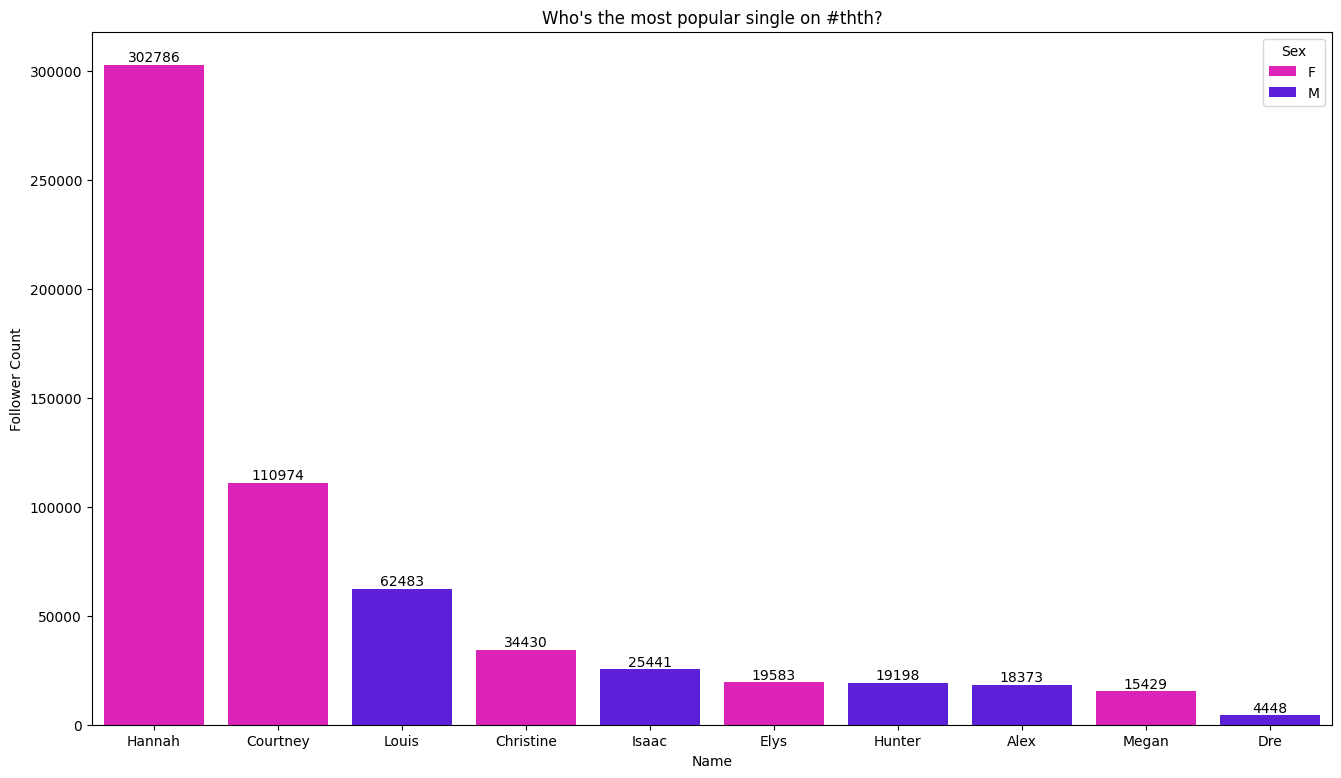

In [5]:
%matplotlib inline

#Who's the most popular before airing?
sns.set_palette([thth_palette['magenta'], thth_palette['blue']])

# Resize the seaborn plot
#plt.figure(figsize=(2*191, 200))

plt.figure(figsize=(16,9))

ax = sns.barplot(data = singles_df.sort_values(by='Baseline', ascending = False), x='First_Name', y= 'Baseline', hue='Sex', dodge = False)


sns.set_style(rc = {'axes.facecolor': thth_palette['aqua']})

plt.xlabel('Name')
plt.ylabel('Follower Count')
plt.title('Who\'s the most popular single on #thth?')

for i in ax.containers:
    ax.bar_label(i,)
# Resize the seaborn plot
#plt.figure(figsize=(2*191, 200))


In [6]:
singles_df

,Unnamed: 0,First_Name,Last_Name,Sex,Insta_URLs,Insta_Handles,Age,Home,Occupation,Baseline
0,0,Dre,Woodard,M,https://www.instagram.com/drewoodard/?hl=en,@drewoodard,23,"Atlanta, USA",Graduate,4448
1,1,Isaac,Francis,M,https://www.instagram.com/isaacfranciss/?hl=en,@isaacfranciss,24,"New Jersey, USA",Model and banker,25441
2,2,Alex,Snell,M,https://www.instagram.com/alexsnelll/?hl=en,@alexsnelll,28,"London, UK",Personal trainer,18373
3,3,Christine,Obanor,F,https://www.instagram.com/christineobanor/?hl=en,@christineobanor,26,"Texas, USA",Model,34430
4,4,Courtney,Randolph,F,https://www.instagram.com/courtneykrandolph/?h...,@courtneykrandolph,25,"Houston, USA",Real estate agent,110974
5,5,Elys,Hutchinson,F,https://www.instagram.com/elys_hutchinson/?hl=en,@elys_hutchinson,23,Switzerland,Model,19583
6,6,Hannah,Brooke,F,https://www.instagram.com/hannahbrooke/?hl=en,@hannahbrooke,24,"LA, USA",Artist,302786
7,7,Hunter,LoNigro,M,https://www.instagram.com/hunting_for_lonigro/...,@hunting_for_lonigro,24,"Arizona, USA",Influencer,19198
8,8,Louis,Russell,M,https://www.instagram.com/louis_russell/?hl=en,@louis_russell,22,"Hampshire, UK",Model,62483
9,9,Megan,Thompson,F,https://www.instagram.com/meganthomsn/?hl=en,@meganthomsn,26,"Cambridge, UK",Personal assistant,15429


In [7]:
baseline_by_sex = singles_df.groupby(by='Sex')['Baseline'].sum()

Text(0.5, 1.0, '#THTH TOTAL BASELINE INSTA FOLLOWERS: GIRLS V. BOYS')

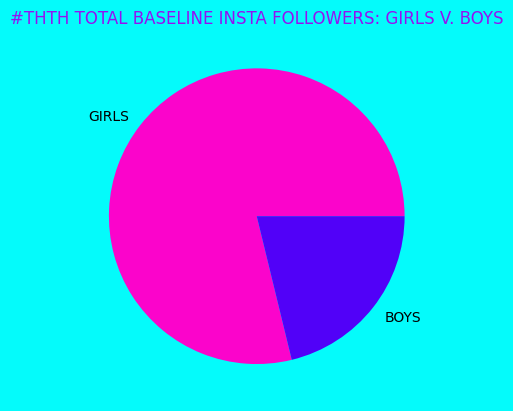

In [8]:
fig, ax = plt.subplots()
ax.pie(baseline_by_sex, labels=['GIRLS', 'BOYS'])

# Background color
fig.set_facecolor(thth_palette['aqua'])
ax.set_title('#THTH TOTAL BASELINE INSTA FOLLOWERS: GIRLS V. BOYS', color=thth_palette['purple'])

In [9]:
singles_df.sort_values('Baseline', ascending= False)['Insta_Handles']

6           @hannahbrooke
4      @courtneykrandolph
8          @louis_russell
3        @christineobanor
1          @isaacfranciss
5        @elys_hutchinson
7    @hunting_for_lonigro
2             @alexsnelll
9            @meganthomsn
0             @drewoodard
Name: Insta_Handles, dtype: object

redoing the baseline stuff without hannah

In [10]:
no_hannah_df = singles_df.loc[singles_df.First_Name != 'Hannah'].reset_index()

In [11]:
no_hannah_df

,index,Unnamed: 0,First_Name,Last_Name,Sex,Insta_URLs,Insta_Handles,Age,Home,Occupation,Baseline
0,0,0,Dre,Woodard,M,https://www.instagram.com/drewoodard/?hl=en,@drewoodard,23,"Atlanta, USA",Graduate,4448
1,1,1,Isaac,Francis,M,https://www.instagram.com/isaacfranciss/?hl=en,@isaacfranciss,24,"New Jersey, USA",Model and banker,25441
2,2,2,Alex,Snell,M,https://www.instagram.com/alexsnelll/?hl=en,@alexsnelll,28,"London, UK",Personal trainer,18373
3,3,3,Christine,Obanor,F,https://www.instagram.com/christineobanor/?hl=en,@christineobanor,26,"Texas, USA",Model,34430
4,4,4,Courtney,Randolph,F,https://www.instagram.com/courtneykrandolph/?h...,@courtneykrandolph,25,"Houston, USA",Real estate agent,110974
5,5,5,Elys,Hutchinson,F,https://www.instagram.com/elys_hutchinson/?hl=en,@elys_hutchinson,23,Switzerland,Model,19583
6,7,7,Hunter,LoNigro,M,https://www.instagram.com/hunting_for_lonigro/...,@hunting_for_lonigro,24,"Arizona, USA",Influencer,19198
7,8,8,Louis,Russell,M,https://www.instagram.com/louis_russell/?hl=en,@louis_russell,22,"Hampshire, UK",Model,62483
8,9,9,Megan,Thompson,F,https://www.instagram.com/meganthomsn/?hl=en,@meganthomsn,26,"Cambridge, UK",Personal assistant,15429


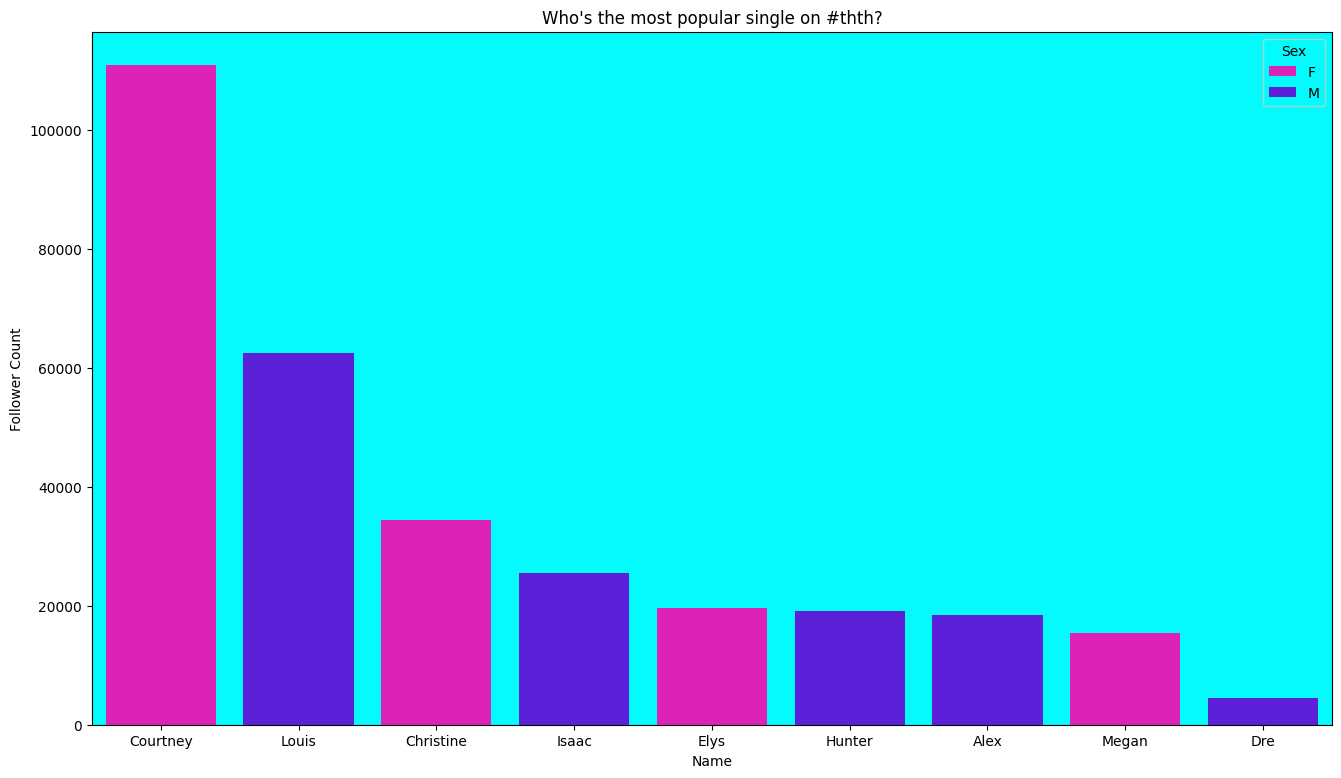

In [12]:
%matplotlib inline

#Who's the most popular before airing?
sns.set_palette([thth_palette['magenta'], thth_palette['blue']])

# Resize the seaborn plot
#plt.figure(figsize=(2*191, 200))

plt.figure(figsize=(16,9))

ax1 = sns.barplot(data = no_hannah_df.sort_values(by='Baseline', ascending = False), x='First_Name', y= 'Baseline', hue='Sex', dodge = False)


sns.set_style(rc = {'axes.facecolor': thth_palette['aqua']})

plt.xlabel('Name')
plt.ylabel('Follower Count')
plt.title('Who\'s the most popular single on #thth?')

for i in ax.containers:
    ax.bar_label(i,)
# Resize the seaborn plot
#plt.figure(figsize=(2*191, 200))


Text(0.5, 1.0, '#THTH TOTAL BASELINE INSTA FOLLOWERS: GIRLS V. BOYS')

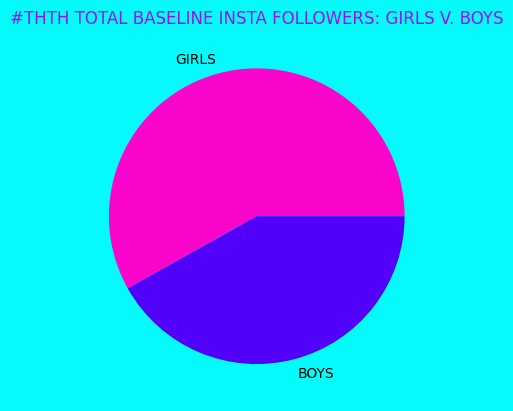

In [13]:
baseline_by_sex_no_hannah = no_hannah_df.groupby(by='Sex')['Baseline'].sum()

fig, ax2 = plt.subplots()
ax2.pie(baseline_by_sex_no_hannah, labels=['GIRLS', 'BOYS'])

# Background color
fig.set_facecolor(thth_palette['aqua'])
ax2.set_title('#THTH TOTAL BASELINE INSTA FOLLOWERS: GIRLS V. BOYS', color=thth_palette['purple'])

In [14]:
baseline_by_sex_no_hannah

Sex
F    180416
M    129943
Name: Baseline, dtype: int64

In [15]:
baseline_by_sex

Sex
F    483202
M    129943
Name: Baseline, dtype: int64

Text(0.5, 1.0, 'with hannah')

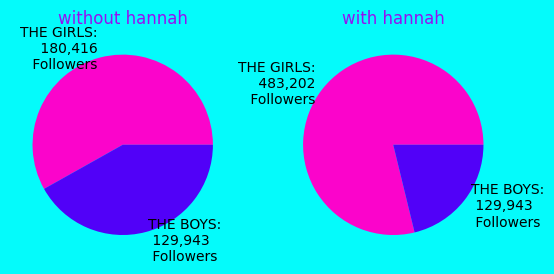

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_facecolor(thth_palette['aqua'])


ax1.pie(baseline_by_sex_no_hannah, labels=['THE GIRLS:\n 180,416\n Followers', 'THE BOYS:\n 129,943\n Followers'])
ax1.set_title('without hannah', color=thth_palette['purple'])

ax2.pie(baseline_by_sex, labels=['THE GIRLS:\n 483,202\n Followers', 'THE BOYS:\n 129,943\n Followers'])
ax2.set_title('with hannah', color=thth_palette['purple'])
